In [4]:
#!conda install -c conda-forge -y iris

In [2]:
#Selecting rainfall data 
#import libraries
import boto3
import json
import urllib.request
import iris

In [3]:
#connect to sqs 
sqs = boto3.client('sqs', region_name='eu-west-2')

In [5]:
#create an empty set to hold files
rainfall_rateF = set()

In [8]:
#Function that extracts filenames i.e. key from Messages and stores in a set
def sqsfunc():
    messages = sqs.receive_message(
    QueueUrl='https://sqs.eu-west-2.amazonaws.com/443602378074/MyQueueNew',
    MaxNumberOfMessages=10)
    for i in messages['Messages']:
        x = json.loads(i['Body'])
        y = json.loads(x['Message'])
        if y['name'] == "rainfall_rate":
            rainfall_rateF.add(y["key"])
        return rainfall_rateF

In [6]:
#checking len of set
len(rainfall_rateF)

0

In [10]:
#downloading 5 files at a time
def download_data_object(rainfall_rateF,n):
    while(len(rainfall_rateF) <=n):
        sqsfunc()
    for i in rainfall_rateF:
        url = "https://s3.eu-west-2.amazonaws.com/" + "aws-earth-mo-atmospheric-mogreps-uk-prd" + "/" + i
        urllib.request.urlretrieve(url, i)
#additionally files can be downloaded to i.e. moved/copied to s3 storage


In [11]:
download_data_object(rainfall_rateF,4)

In [7]:
rainfall_rateF

set()

In [8]:
rainfall_rateF = list(rainfall_rateF)

In [10]:
rainfall_rateF

['dce6019f27ab15b05daac6c85f47b5993268d8c3.nc']

In [11]:
#Looking at file content,here n is number of files
def rainfall_rateF_data(rainfall_rateF,n):
    for i in rainfall_rateF[0:n]:
        filename = i
        listofcubes = iris.load(filename)
        cube = listofcubes[0]
        print("--filename: " + i)
        print("--listofcubes in file: \n" ,listofcubes,end="\n--Printing Cube now\n")
        realization = cube.coord('realization').points
        print("realization: " ,realization)

In [12]:
rainfall_rateF_data(rainfall_rateF,1)

--filename: dce6019f27ab15b05daac6c85f47b5993268d8c3.nc
--listofcubes in file: 
 0: rainfall_rate / (m s-1)             (realization: 3; projection_y_coordinate: 970; projection_x_coordinate: 1042)
--Printing Cube now
realization:  [15 16 17]


In [13]:
import matplotlib.pyplot as plt
import iris.quickplot as qplt

#Plotting one by one for each realization

In [14]:
#function that takes list of files and desired number of files
def plotting_rain(rainfall_rateF,n):
    for i in rainfall_rateF[0:n]:
        filename = i
        listofcubes = iris.load(filename)
        cube = listofcubes[0]
        realization = cube.coord('realization').points
        for i in realization:
            extracted_cube = cube.extract(iris.Constraint(realization=i))
            qplt.pcolormesh(extracted_cube,cmap='RdBu_r')
            plt.gca().coastlines()
            plt.show()

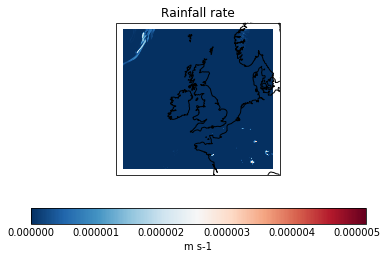

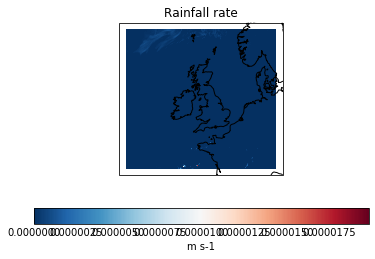

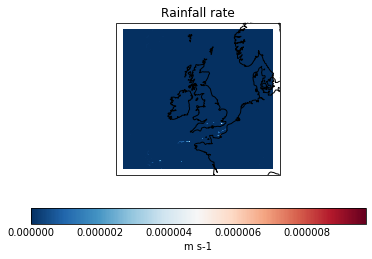

In [15]:
plotting_rain(rainfall_rateF,1)

In [16]:
#countour plot
#function that takes list of files and desired number of files
def plotting_rain(rainfall_rateF,n):
    for i in rainfall_rateF[0:n]:
        filename = i
        listofcubes = iris.load(filename)
        cube = listofcubes[0]
        realization = cube.coord('realization').points
        for i in realization:
            extracted_cube = cube.extract(iris.Constraint(realization=i))
            qplt.contourf(extracted_cube, 5,cmap='GnBu_r')
            plt.gca().coastlines()
            plt.show()

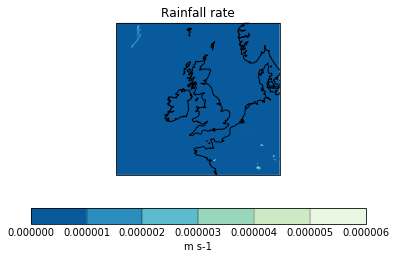

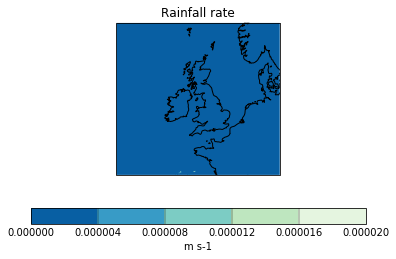

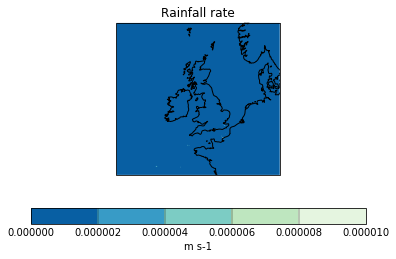

In [17]:
plotting_rain(rainfall_rateF,1)

In [18]:
#countor plot
#function that takes list of files and desired number of files
def plotting_rain(rainfall_rateF,n):
    for i in rainfall_rateF[0:1]:
        filename = i
        listofcubes = iris.load(filename)
        cube = listofcubes[0]
        realization = cube.coord('realization').points
        for i in realization:
            extracted_cube = cube.extract(iris.Constraint(realization=i))
            contour = qplt.contour(extracted_cube,cmap='BrBG')
            plt.gca().coastlines()
            plt.clabel(contour, inline=False)
            plt.show()

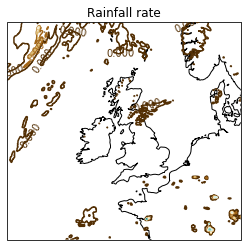

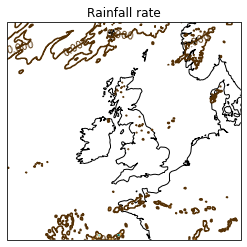

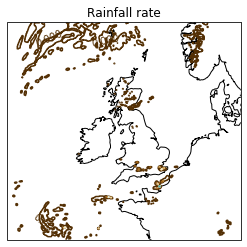

In [19]:
plotting_rain(rainfall_rateF,1)

In [20]:
for i in rainfall_rateF[0:1]:
        filename = i
        listofcubes = iris.load(filename)
        cube = listofcubes[0]
print(cube)


rainfall_rate / (m s-1)             (realization: 3; projection_y_coordinate: 970; projection_x_coordinate: 1042)
     Dimension coordinates:
          realization                           x                           -                             -
          projection_y_coordinate               -                           x                             -
          projection_x_coordinate               -                           -                             x
     Scalar coordinates:
          forecast_period: 388800 seconds
          forecast_reference_time: 2020-09-16 10:00:00
          time: 2020-09-20 22:00:00
     Attributes:
          Conventions: CF-1.5, UKMO-1.0
          history: 2020-09-16T12:34:46Z: StaGE Decoupler
          institution: Met Office
          least_significant_digit: 9.0
          mosg__forecast_run_duration: PT126H
          mosg__grid_domain: uk_extended
          mosg__grid_type: standard
          mosg__grid_version: 2.2.0
          mosg__model_configur

In [21]:
realization = cube.coord('realization').points
projection_y = cube.coord('projection_y_coordinate').points
projection_x = cube.coord('projection_x_coordinate').points
print(realization[0:],
projection_y[0:5],
projection_x[0:5])

[15 16 17] [-1036000. -1034000. -1032000. -1030000. -1028000.] [-1158000. -1156000. -1154000. -1152000. -1150000.]


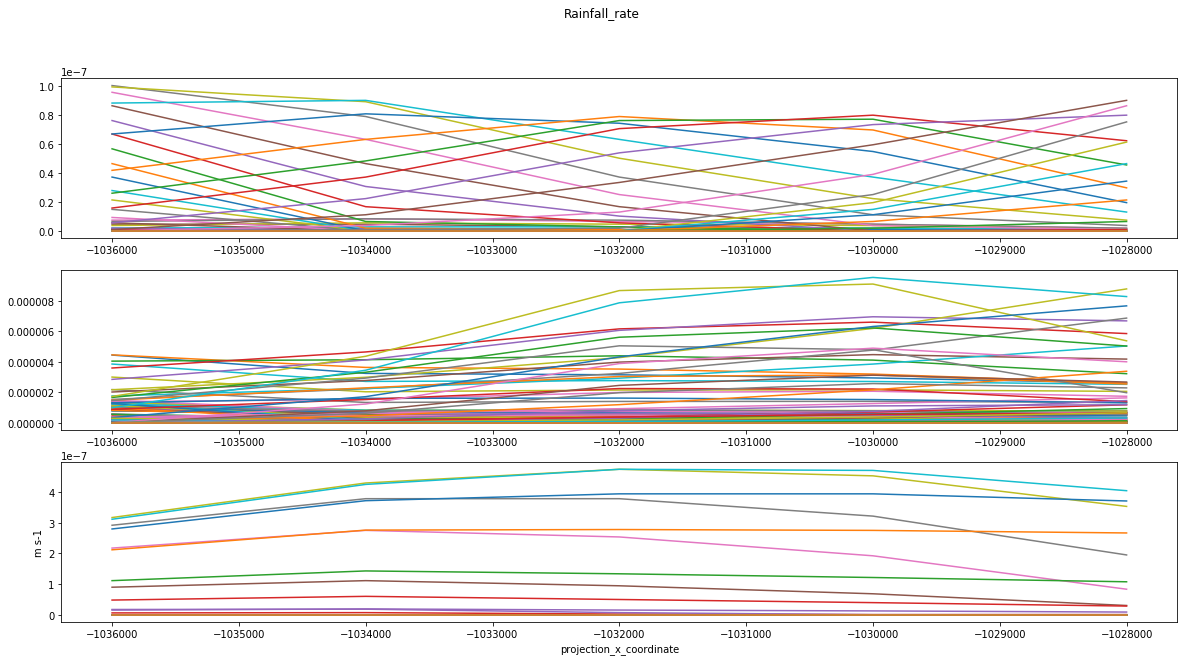

In [30]:
#Option 1.1
#converting into dataframe using iris - as_data_frame
#plotting for all realization and downloading df_to_csv files for df, top values
#this files can then be used to plot/visualize with different tools

from iris.pandas import as_cube, as_series, as_data_frame
df_to_csvI = []
fig,axs = plt.subplots(3,figsize=(20, 10))
fig.suptitle('Rainfall_rate')
for i in realization:
    extracted_cube = cube.extract(iris.Constraint(realization=i))
    #df = as_data_frame(extracted_cube)
    df = as_data_frame(extracted_cube)
    df.index.name = 'latitudes'
    df.columns.name = 'longitudes'
    df.to_csv('df'+ '_h' + str(i) + '.csv')
    df_to_csvI.append('df' + '_h'+ str(i) + '.csv')
    n = len(df_to_csvI)-1
    axs[n].plot(df.head())
    plt.xlabel("projection_x_coordinate")
    plt.ylabel(cube.units)
plt.show()


In [31]:
df.head(2)

longitudes,-1158000.0,-1156000.0,-1154000.0,-1152000.0,-1150000.0,-1148000.0,-1146000.0,-1144000.0,-1142000.0,-1140000.0,...,906000.0,908000.0,910000.0,912000.0,914000.0,916000.0,918000.0,920000.0,922000.0,924000.0
latitudes,,,,,,,,,,,,,,,,,,,,,
-1036000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-1034000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


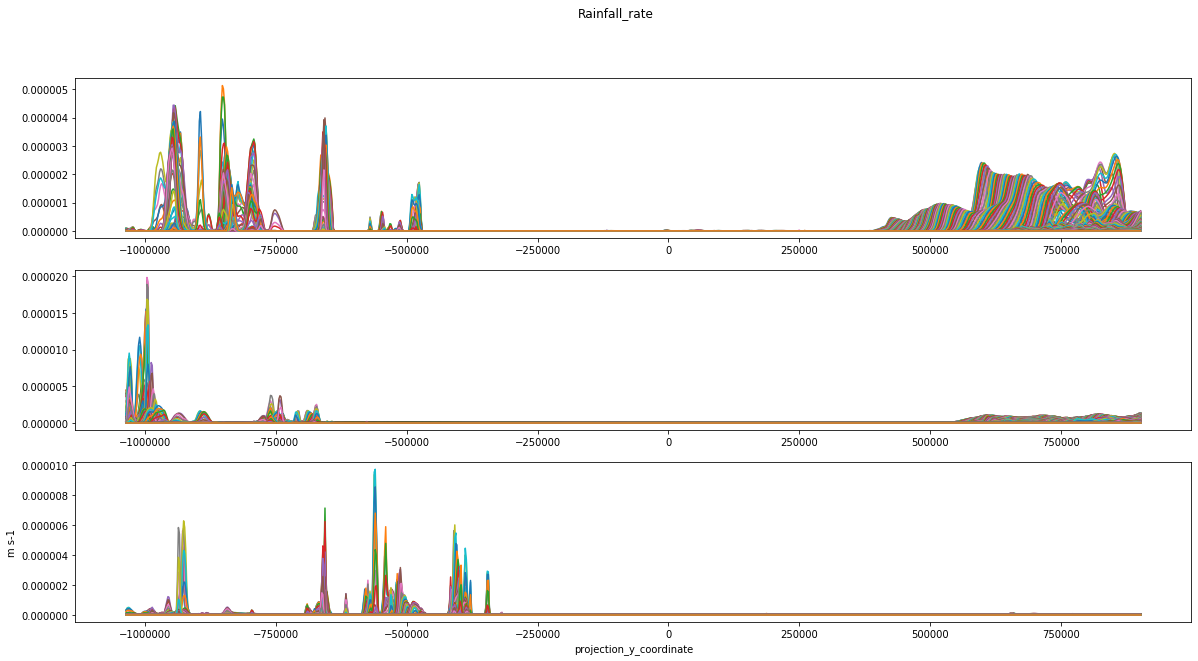

In [32]:
#option 1.2
#converting into dataframe using iris - as_data_frame
#plotting for all realization and downloading df_to_csv files
#this files can then be used to plot/visualize with different tools

from iris.pandas import as_cube, as_series, as_data_frame
df_to_csvIF = []
fig,axs = plt.subplots(3,figsize=(20, 10))
fig.suptitle('Rainfall_rate')
for i in realization:
    extracted_cube = cube.extract(iris.Constraint(realization=i))
    df = as_data_frame(extracted_cube)
    df.index.name = 'latitudes'
    df.columns.name = 'longitudes'
    df.to_csv('df'+ '_' + str(i) + '.csv')
    df_to_csvIF.append('df_'+str(i) + '.csv')
    n = len(df_to_csvIF)-1
    axs[n].plot(df)
    plt.xlabel("projection_y_coordinate")
    plt.ylabel(cube.units)
plt.show()

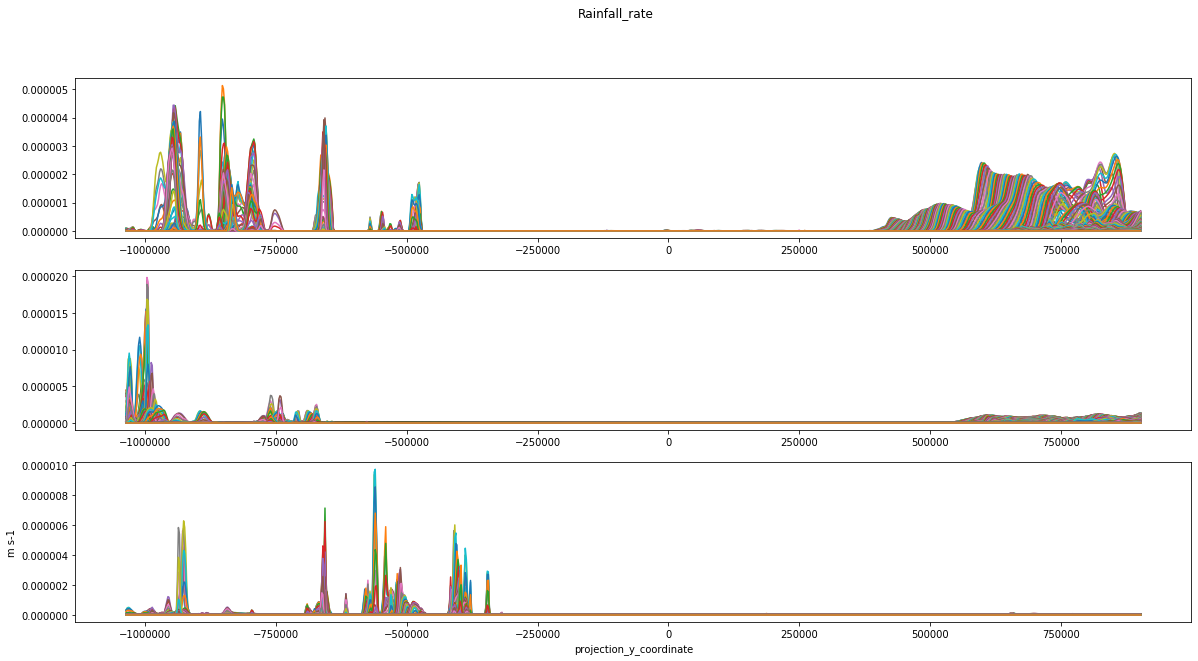

In [33]:
#Option 2
#converting into dataframe using pandas
#plotting for all realization and downloading df_to_csv files
#this files can then be used to plot/visualize with different tools
import pandas as pd
df_to_csv = []
fig,axs = plt.subplots(3,figsize=(20, 10))
fig.suptitle('Rainfall_rate')
for i in realization:
    extracted_cube = cube.extract(iris.Constraint(realization=i))
    cubedf = pd.DataFrame(extracted_cube.data,columns=projection_x,index=projection_y)
    cubedf.index.name = 'latitudes'
    cubedf.columns.name = 'longitudes'
    df_to_csv.append('cubedf_'+str(i) + '.csv')
    n = len(df_to_csv)-1
    axs[n].plot(cubedf)
    plt.xlabel("projection_y_coordinate")
    plt.ylabel(cube.units)
plt.show()


In [34]:
#List of files that were used to plot
df_to_csv

['cubedf_15.csv', 'cubedf_16.csv', 'cubedf_17.csv']

In [35]:
#List of files that were used to plot
df_to_csvI

['df_h15.csv', 'df_h16.csv', 'df_h17.csv']

In [36]:
#List of files that were used to plot
df_to_csvIF

['df_15.csv', 'df_16.csv', 'df_17.csv']

In [37]:
final_files = [df_to_csvI,df_to_csvIF]

In [38]:
import boto3
s3 = boto3.client('s3',region_name='eu-west-2')
for i in final_files:
    for j in i:
        s3.upload_file(j, 'mogrepswrk', j)

In [39]:
#The files used for this task were
rainfall_rateF


['dce6019f27ab15b05daac6c85f47b5993268d8c3.nc']

In [130]:
#optional as files can also be accessed from original s3 bucket (URL mentioned above)
#import boto3
#s3 = boto3.client('s3',region_name='eu-west-2')
#for i in rainfall_rateF:
#    s3.upload_file(i, 'mogrepswrk', i)